# Equity Technicals 

Here we explore how to fetch equity prices format them in a data frame and calculate various
metrics of the OHLCV data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
plt.style.use('dark_background')

import sys
sys.path.append('/Users/markwindsor/Desktop/atlas_trade')
from src.utils.technical_indicators import *



## Fetch Data

Here we will fetch data from whereever we want. We'll put some examples of different sources.
and we'll turn it into a data frame. First entries should be the oldest and some sources,
need the data to be reversed.

In [2]:
# SHARADAR Data

url = "https://data.nasdaq.com/api/v3/datatables/SHARADAR/SEP?ticker=ABCL&api_key=zxLNKQydu_qNXQ2tZ7vz"
response = requests.get(url)
data = response.json()

datatable = data['datatable']['data'][::-1]  # Reversing the order
columns = [column['name'] for column in data['datatable']['columns']]

df = pd.DataFrame(datatable, columns=columns)
df.set_index("date", inplace=True)  # Set "date" column as the index

# Drop any columns we may not want
columns_to_drop = ["closeadj", "closeunadj", "lastupdated"]
df.drop(columns=columns_to_drop, inplace=True)



In [3]:
df

,ticker,open,high,low,close,volume
date,,,,,,
2020-12-11,ABCL,61.000,71.910,48.980,58.90,9249222.0
2020-12-14,ABCL,56.926,60.691,50.000,50.01,1487276.0
2020-12-15,ABCL,50.810,52.210,45.260,46.99,3957992.0
2020-12-16,ABCL,47.130,49.730,42.150,47.53,1688698.0
2020-12-17,ABCL,48.540,50.500,48.140,48.60,636322.0
...,...,...,...,...,...,...
2023-08-16,ABCL,5.500,5.595,5.460,5.50,2044178.0
2023-08-17,ABCL,5.540,5.630,5.485,5.50,2499458.0
2023-08-18,ABCL,5.420,5.595,5.410,5.49,1483648.0


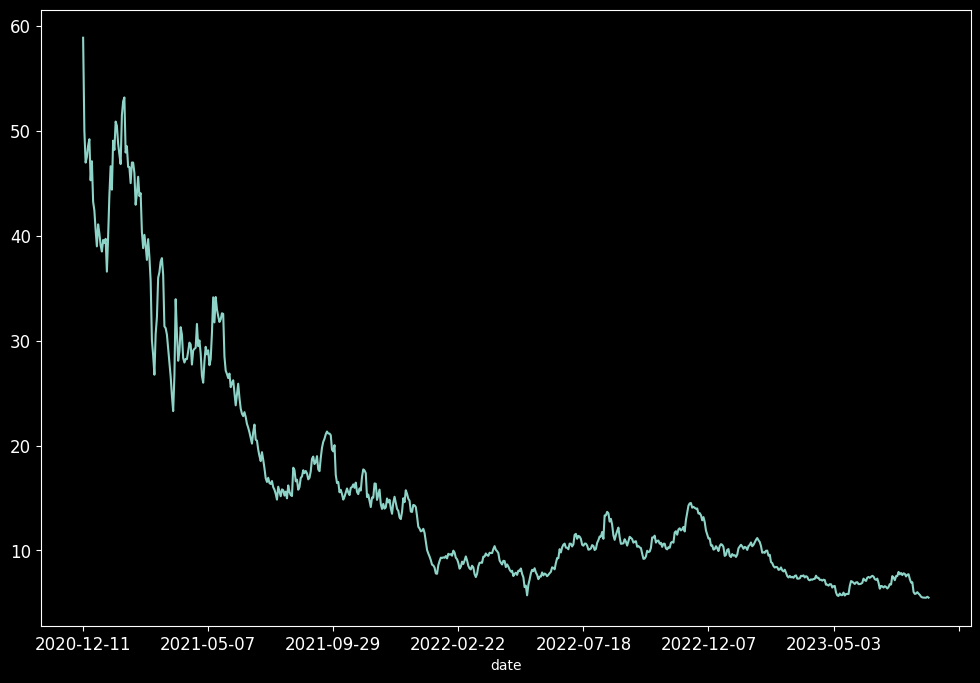

In [4]:
df.close.plot(figsize=(12, 8), title = "", fontsize=12)
plt.show()

## Returns 

Now we want to add some returns columns

Simple Returns:  (endValue - beginningValue) / beginningValue

Log Returns: ln(endValue / beginningValue)

Cumulative Returns: logReturn1 + logReturn2 + ... logReturn(n)

Cumulative log returns are based on logarithmic changes and are additive, making them suitable for capturing continuous compounding effects and mathematical accuracy.
Cumulative returns (simple returns) directly represent the overall percentage change over time and are more intuitive for most investors.

In [5]:
df["simple_returns"] = (df.close - df.close.shift(1)) / df.close.shift(1)
df["log_returns"] = np.log(df.close / df.close.shift(1))
# Calculate cumulative log returns
df["cumulative_log_returns"] = df["log_returns"].cumsum()

df


,ticker,open,high,low,close,volume,simple_returns,log_returns,cumulative_log_returns
date,,,,,,,,,
2020-12-11,ABCL,61.000,71.910,48.980,58.90,9249222.0,NaN,NaN,NaN
2020-12-14,ABCL,56.926,60.691,50.000,50.01,1487276.0,-0.150934,-0.163618,-0.163618
2020-12-15,ABCL,50.810,52.210,45.260,46.99,3957992.0,-0.060388,-0.062288,-0.225906
2020-12-16,ABCL,47.130,49.730,42.150,47.53,1688698.0,0.011492,0.011426,-0.214480
2020-12-17,ABCL,48.540,50.500,48.140,48.60,636322.0,0.022512,0.022262,-0.192218
...,...,...,...,...,...,...,...,...,...
2023-08-16,ABCL,5.500,5.595,5.460,5.50,2044178.0,-0.003623,-0.003630,-2.371093
2023-08-17,ABCL,5.540,5.630,5.485,5.50,2499458.0,0.000000,0.000000,-2.371093
2023-08-18,ABCL,5.420,5.595,5.410,5.49,1483648.0,-0.001818,-0.001820,-2.372913


## Technicals

Here we import some technicals and add these calculations to the dataframe

Average True Range

Moving Average Convergence Divergence

Relative Strength Index

Average Directional Index

Stochastic Oscillator

Bollinger Bands

In [6]:
df = average_true_range(df)
df = macd(df)
df = relative_strength_index(df)
df = average_directional_index(df)
df = stochastic_oscillator(df)
df = bollinger_bands(df)
df

,ticker,open,high,low,close,volume,simple_returns,log_returns,cumulative_log_returns,H-L,...,+di,-di,dx,adx,%K,%D,rolling_mean,rolling_std,upper_band,lower_band
date,,,,,,,,,,,,,,,,,,,,,
2020-12-11,ABCL,61.000,71.910,48.980,58.90,9249222.0,NaN,NaN,NaN,22.930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,ABCL,56.926,60.691,50.000,50.01,1487276.0,-0.150934,-0.163618,-0.163618,10.691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-15,ABCL,50.810,52.210,45.260,46.99,3957992.0,-0.060388,-0.062288,-0.225906,6.950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-16,ABCL,47.130,49.730,42.150,47.53,1688698.0,0.011492,0.011426,-0.214480,7.580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-17,ABCL,48.540,50.500,48.140,48.60,636322.0,0.022512,0.022262,-0.192218,2.360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-16,ABCL,5.500,5.595,5.460,5.50,2044178.0,-0.003623,-0.003630,-2.371093,0.135,...,20.509734,85.664759,61.365986,55.045390,1.673640,1.266005,6.7485,0.936462,8.621424,4.875576
2023-08-17,ABCL,5.540,5.630,5.485,5.50,2499458.0,0.000000,0.000000,-2.371093,0.145,...,19.767625,69.122599,55.523512,55.109140,1.673640,1.394700,6.6375,0.946761,8.531022,4.743978
2023-08-18,ABCL,5.420,5.595,5.410,5.49,1483648.0,-0.001818,-0.001820,-2.372913,0.185,...,13.427738,52.358954,59.177951,55.651648,3.448276,2.265185,6.5195,0.934680,8.388859,4.650141


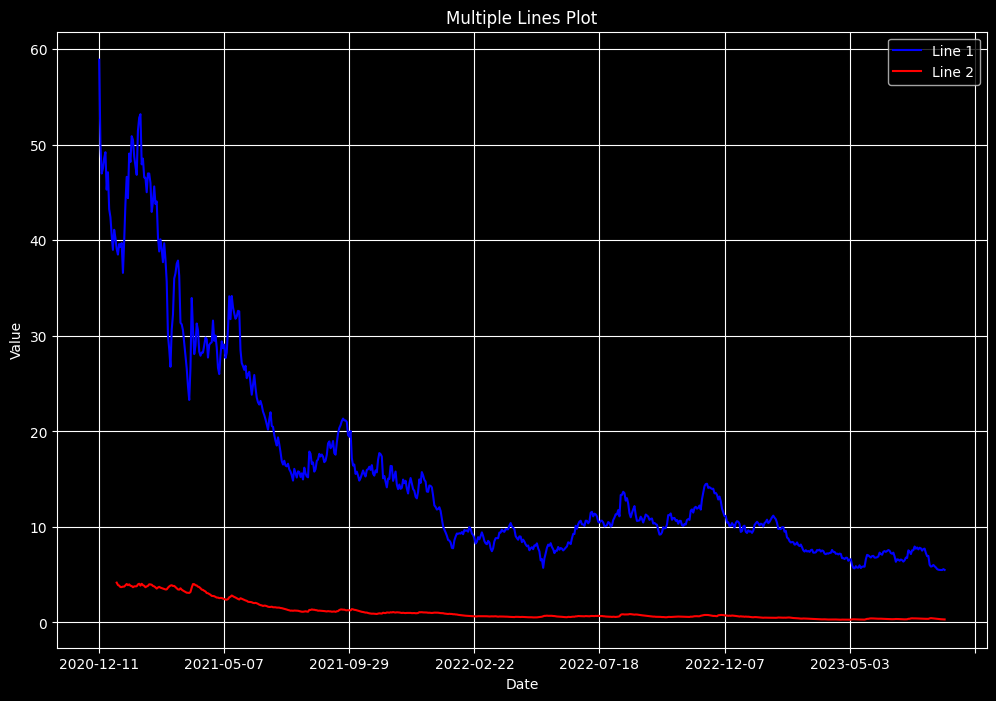

In [7]:
plt.figure(figsize=(12, 8))

df['simple_returns'].plot(label='Line 1', color='blue')
df['ATR'].plot(label='Line 2', color='red')

plt.title("Multiple Lines Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()

plt.show()